In [1]:
import pandas as pd

datafile = '/home/ec2-user/SageMaker/mariano/datasets/displaced_persons/simulation_results/auc_results.csv'

df = pd.read_csv(datafile,)
df = df.drop(columns=['Unnamed: 0'])
print(df.shape)
df.head()


(54, 7)


,representation,Model,Ranking Function,Accuracy,Precision,Recall,F1-Score
0,bow,logreg,relevance,0.906281,0.627357,0.850502,0.693947
1,bow,logreg,uncertainty,0.900291,0.579390,0.923180,0.686294
2,bow,logreg,1quarter_relevance_3quarters_uncertainty,0.903891,0.588670,0.924124,0.697974
3,bow,logreg,3quarter_relevance_1quarters_uncertainty,0.906281,0.627357,0.850502,0.693947
4,bow,logreg,relevance_with_avg_diversity,0.913363,0.649813,0.822713,0.698241


model=logreg     - representation = glove  - auxdf.shape(9, 7)
model=logreg     - representation = bow    - auxdf.shape(9, 7)


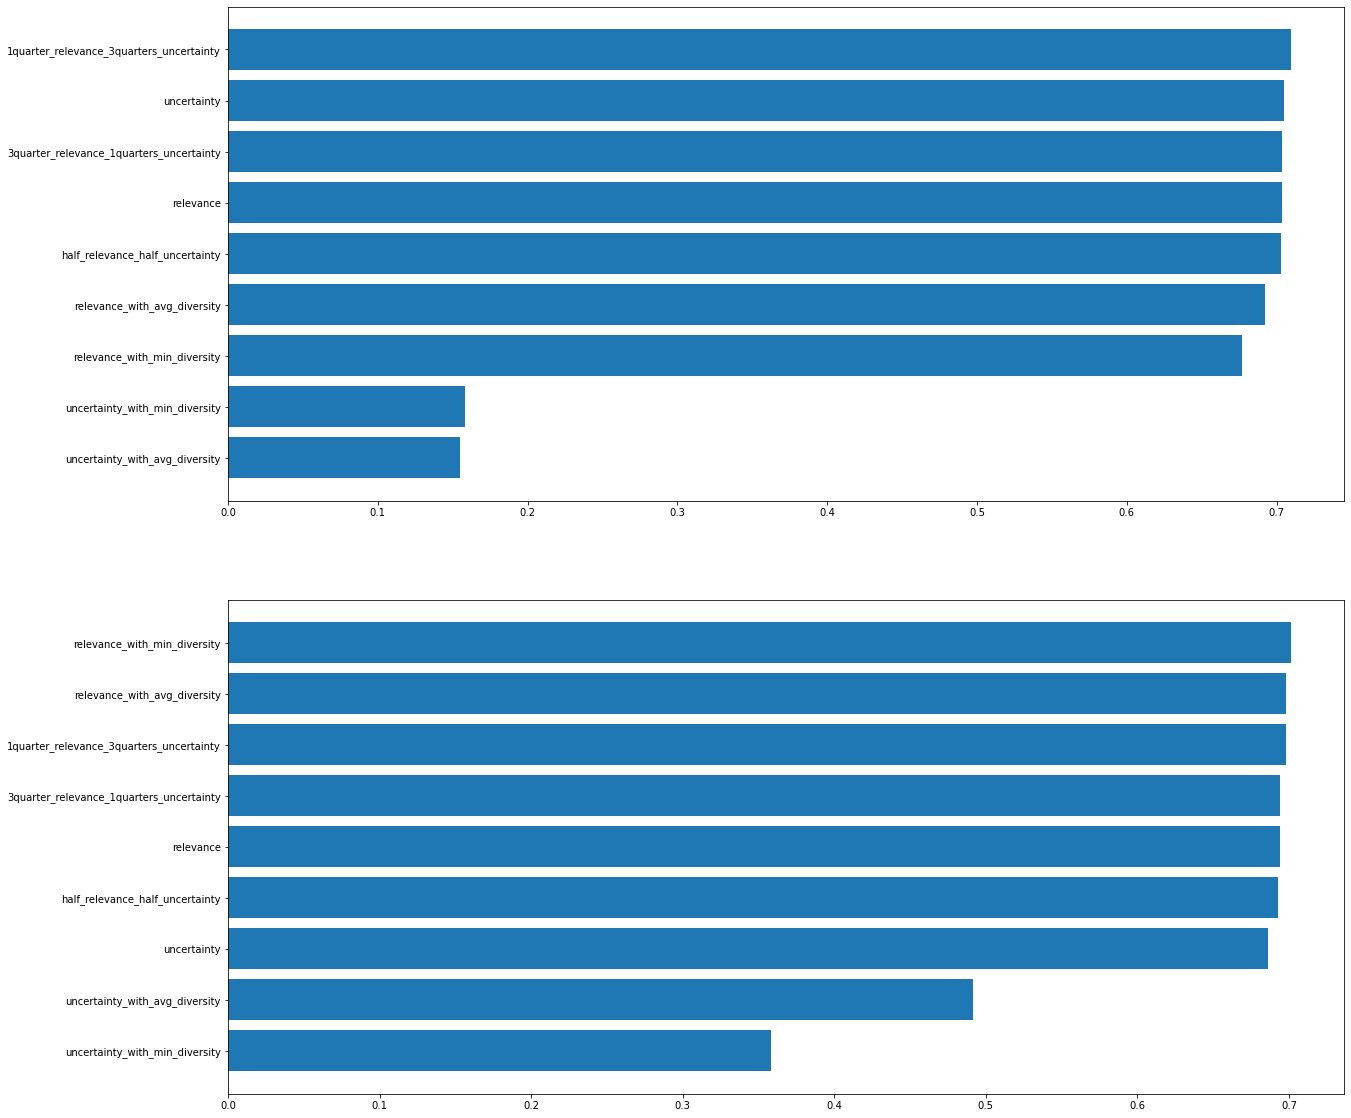

In [63]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(2, figsize=(20,20))
# idx=0
# for model in set(df['Model']):
#     for represtentation in set(df['representation']):
#         auxdf=df[(df['Model']==model) & (df['representation']==represtentation)]
#         auxdf = auxdf.sort_values(by=['F1-Score'])
#         ax[idx].barh(y=range(auxdf.shape[0]),width=auxdf['F1-Score'],tick_label=auxdf['Ranking Function'])
# #         sorted_functions=auxdf['Ranking Function']
    
#         print(f'model={model:10} - representation = {represtentation:6} - auxdf.shape{auxdf.shape}')
#         idx+=1
#         if idx==2:
#             break
#     break
# #         idx+=1

# Comparison relevance ranking functions

In [8]:
import numpy as np 

data = {}

ranking_functions=None

models = ['logreg','svm']
representations=['glove', 'bow', 'sbert']
for model in models:
    for representation in representations:
        auxdf=df[(df['Model']==model) & (df['representation']==representation)]
        auxdf = auxdf.sort_values(by=['Ranking Function'], )
        
        if not ranking_functions is None:
            assert all([elem1==elem2 for elem1,elem2 in zip(ranking_functions, auxdf['Ranking Function'])])
            
        ranking_functions=auxdf['Ranking Function']
        
        order = np.argsort(auxdf['F1-Score'])
        
        position={}
        for idx,rf in enumerate(np.array(ranking_functions)[order]):
            position[rf]=idx+1
            
#         for rf in ranking_functions:
#             print(f'{rf:40}: #{position[rf]}')
        data[f'{model}-{representation}'] = [position[rf] for rf in ranking_functions]
#         print('---')
#     break
#         sorted_functions=auxdf['Ranking Function']
#         index
orders = pd.DataFrame(data, index=ranking_functions)
orders=orders.sort_values(by=[f'{models[0]}-{representations[0]}'], ascending=False)
orders

,logreg-glove,logreg-bow,logreg-sbert,svm-glove,svm-bow,svm-sbert
Ranking Function,,,,,,
1quarter_relevance_3quarters_uncertainty,9,7,7,8,6,9
uncertainty,8,3,3,9,7,5
relevance,7,6,9,7,3,7
3quarter_relevance_1quarters_uncertainty,6,5,8,6,5,6
half_relevance_half_uncertainty,5,4,6,5,4,8
relevance_with_avg_diversity,4,8,4,3,1,4
relevance_with_min_diversity,3,9,5,4,2,3
uncertainty_with_min_diversity,2,1,2,2,8,2
uncertainty_with_avg_diversity,1,2,1,1,9,1


/tmp/ipykernel_61167/2172289092.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipykernel_61167/2172289092.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(['0']+list(orders.columns))


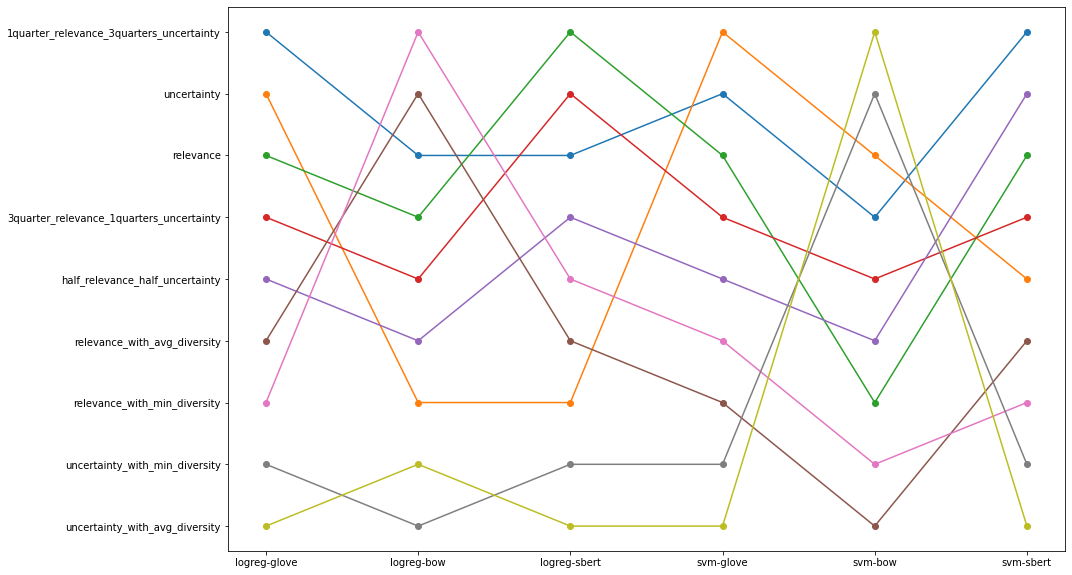

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,figsize=(15,10))
for row in range(orders.shape[0]):
    ax.plot(range(orders.shape[1]),orders.iloc[row,:], label=orders.index[row], marker='o')
    
labels = ['0']+ list(orders.index)[::-1]

ax.set_yticklabels(labels)
_ = ax.set_xticklabels(['0']+list(orders.columns))
# ax.legend()

In [12]:
orders.mean(axis=1)

Ranking Function
1quarter_relevance_3quarters_uncertainty    7.666667
uncertainty                                 5.833333
relevance                                   6.500000
3quarter_relevance_1quarters_uncertainty    6.000000
half_relevance_half_uncertainty             5.333333
relevance_with_avg_diversity                4.000000
relevance_with_min_diversity                4.333333
uncertainty_with_min_diversity              2.833333
uncertainty_with_avg_diversity              2.500000
dtype: float64

In [14]:
orders.std(axis=1)

Ranking Function
1quarter_relevance_3quarters_uncertainty    1.211060
uncertainty                                 2.562551
relevance                                   1.974842
3quarter_relevance_1quarters_uncertainty    1.095445
half_relevance_half_uncertainty             1.505545
relevance_with_avg_diversity                2.280351
relevance_with_min_diversity                2.503331
uncertainty_with_min_diversity              2.562551
uncertainty_with_avg_diversity              3.209361
dtype: float64

# Comparison of different models-representation


In [51]:
dfcopy=df.copy()
dfcopy['model-representation']=[f'{model}-{representation}' \
                               for model,representation in zip(dfcopy['Model'], dfcopy['representation'])]
data = {}
model_representations=None
relevance_ranking_functions=list(set(dfcopy['Ranking Function']))
for relevance_ranking in relevance_ranking_functions:
    auxdf=dfcopy[dfcopy['Ranking Function']==relevance_ranking]
    auxdf.sort_values(by=['model-representation'])
    if model_representations is not None:
        assert all([elem1==elem2 for elem1,elem2 in zip(model_representations,auxdf['model-representation'])])
    else:        
        model_representations=list(auxdf['model-representation'])

    order=np.argsort(auxdf['F1-Score'])
    position={}
    for idx,model_repr in enumerate(np.array(model_representations)[order]):
        position[model_repr]=idx+1    
        
    data[relevance_ranking] = [position[model_repr] for model_repr in model_representations]

    
orders = pd.DataFrame(data, index=model_representations)

orders=orders.sort_values(by=[f'{relevance_ranking_functions[0]}'], ascending=False)
orders

,relevance_with_min_diversity,relevance_with_avg_diversity,uncertainty_with_avg_diversity,relevance,half_relevance_half_uncertainty,uncertainty,uncertainty_with_min_diversity,1quarter_relevance_3quarters_uncertainty,3quarter_relevance_1quarters_uncertainty
logreg-bow,6,6,6,5,5,5,6,5,5
logreg-glove,5,5,2,6,6,6,2,6,6
logreg-sbert,4,4,1,4,4,3,1,3,4
svm-sbert,3,3,3,3,3,4,3,4,3
svm-glove,2,2,4,2,2,2,4,2,2
svm-bow,1,1,5,1,1,1,5,1,1


/tmp/ipykernel_61167/3021800247.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipykernel_61167/3021800247.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(['0']+list(orders.columns), rotation=45)


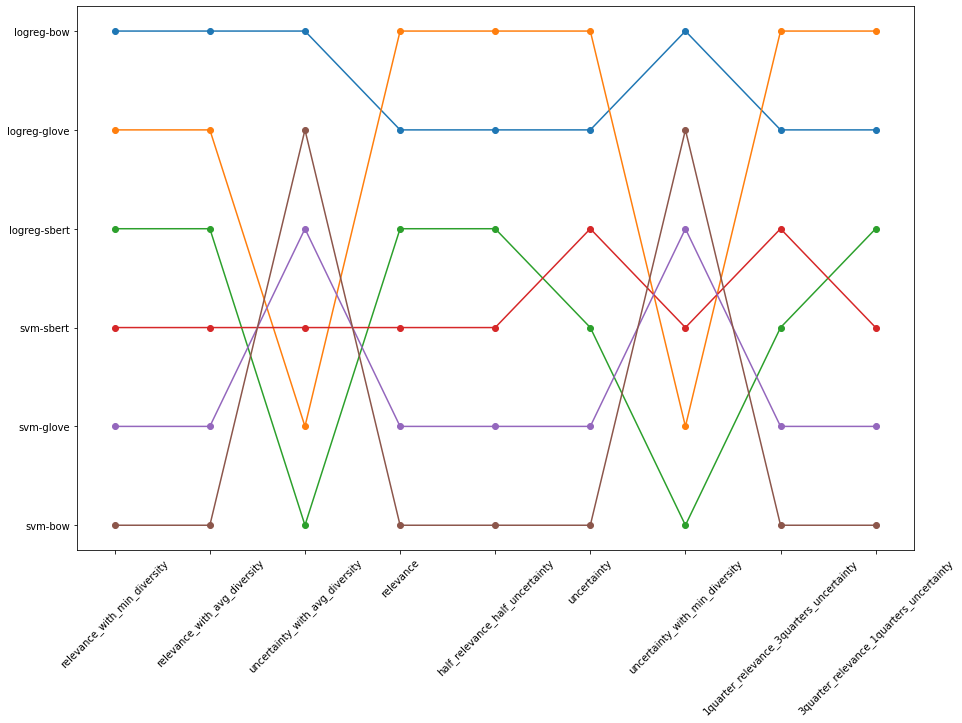

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,figsize=(15,10))
for row in range(orders.shape[0]):
    ax.plot(range(orders.shape[1]),orders.iloc[row,:], label=orders.index[row], marker='o')
    
labels = ['0']+ list(orders.index)[::-1]

ax.set_yticklabels(labels)
_ = ax.set_xticklabels(['0']+list(orders.columns), rotation=45)
# _ = ax.set_xticklabels(['0']+list(orders.columns))
# ax.legend()

In [48]:
model_representations

['logreg-bow',
 'svm-bow',
 'logreg-sbert',
 'svm-sbert',
 'logreg-glove',
 'svm-glove']